Constants

In [11]:
# paths
INPUT_PATH = '/Users/miqbalshdq/Documents/Projects/PUSKA-Full/Research/datasets/raw'
OUTPUT_PATH = '/Users/miqbalshdq/Documents/Projects/PUSKA-Full/Research/datasets/cleaned'
PLOT_PATH = '/Users/miqbalshdq/Documents/Projects/PUSKA-Full/Research/plots'

# threshold
TOTAL_DAY_TO_FILL_MISSING_VALUES = 7

Import Libraries

In [12]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

EDA and Preprocessing

JAWA TIMUR.csv


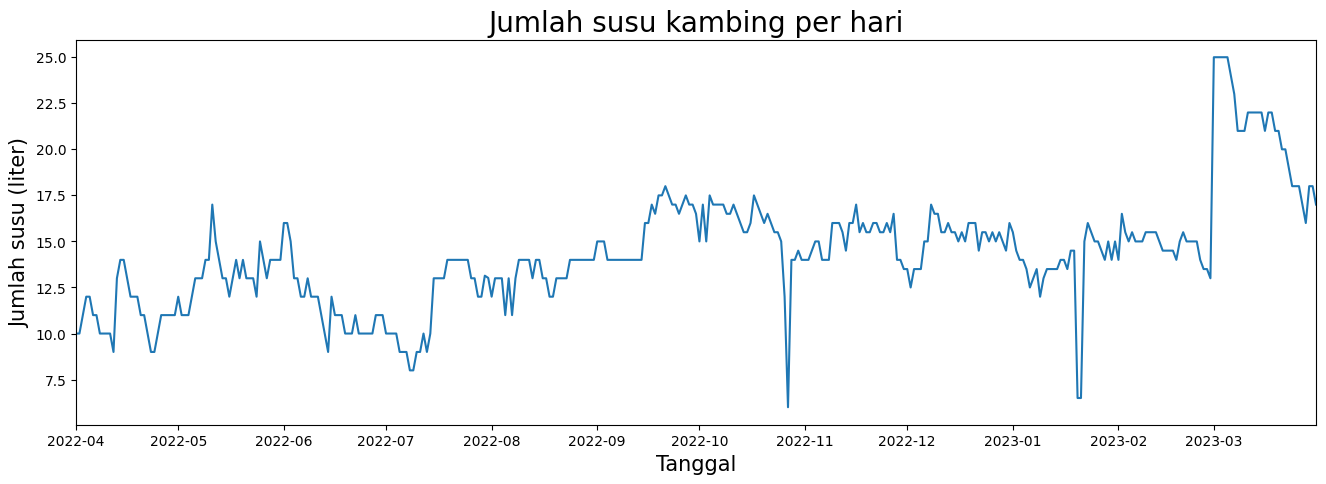

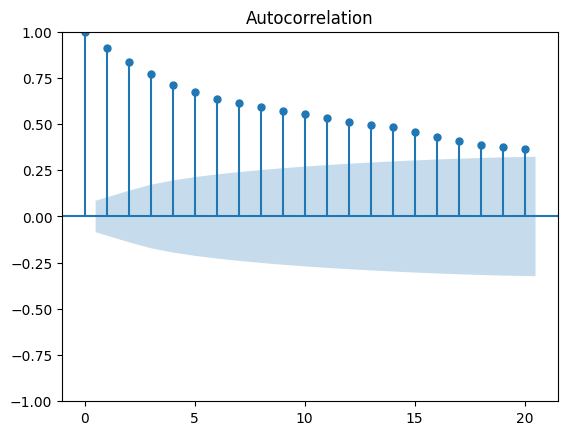

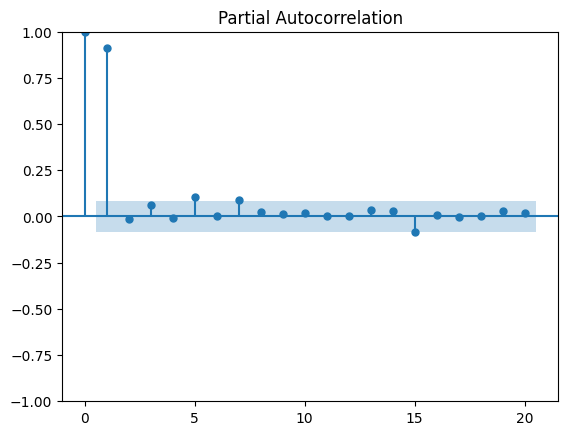

JAWA TIMUR_KAB. PROBOLINGGO_prof farm.csv


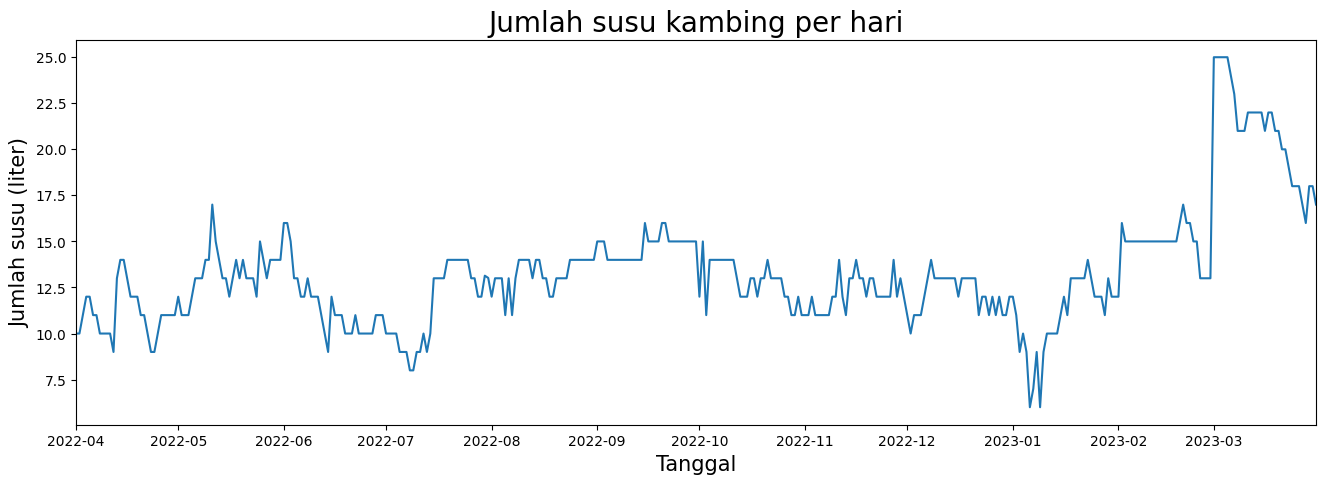

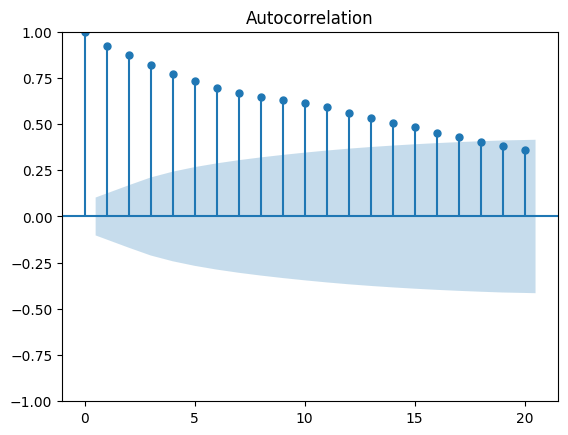

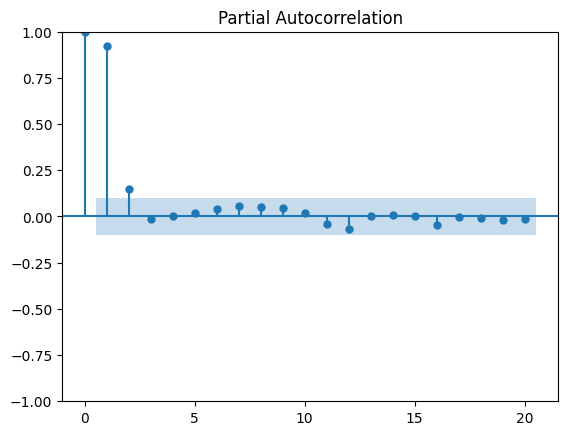

JAWA TIMUR_KAB. PROBOLINGGO_nyx farm.csv


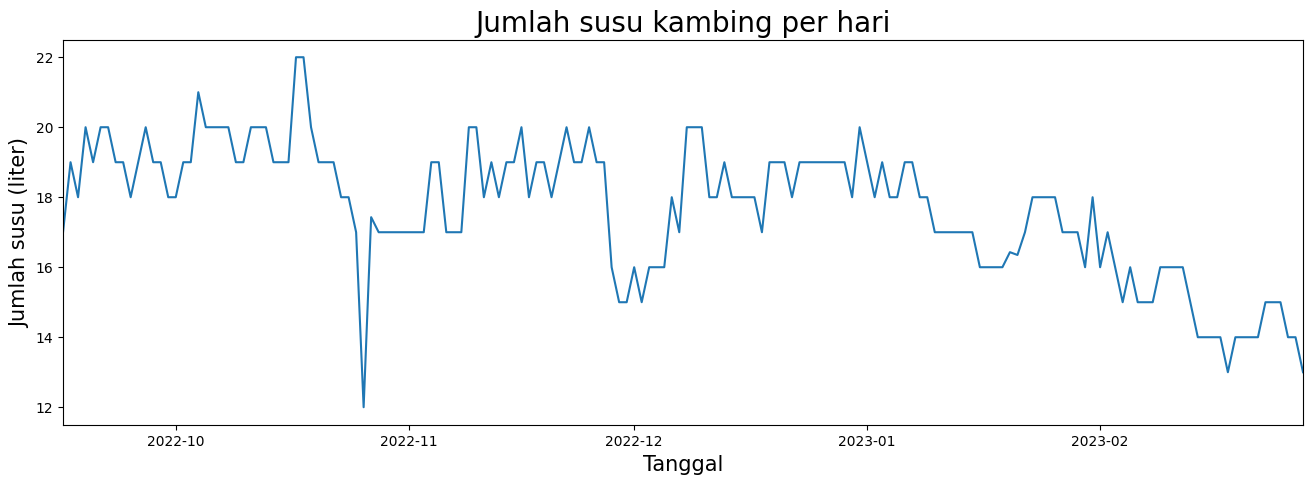

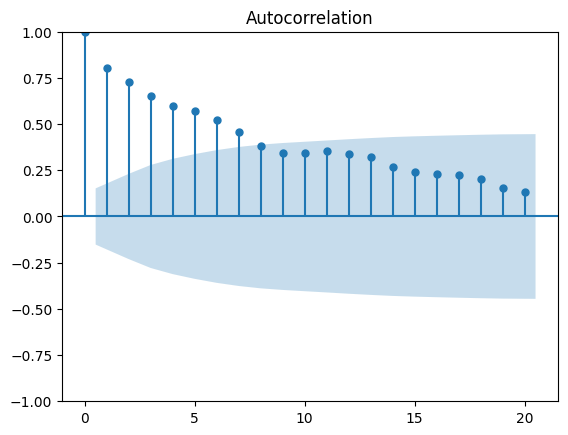

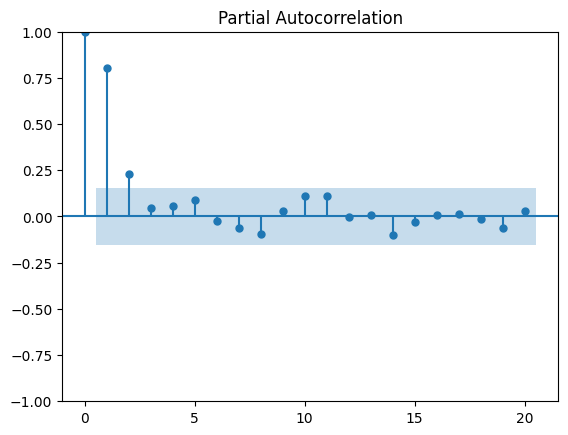

JAWA TIMUR_KAB. PROBOLINGGO.csv


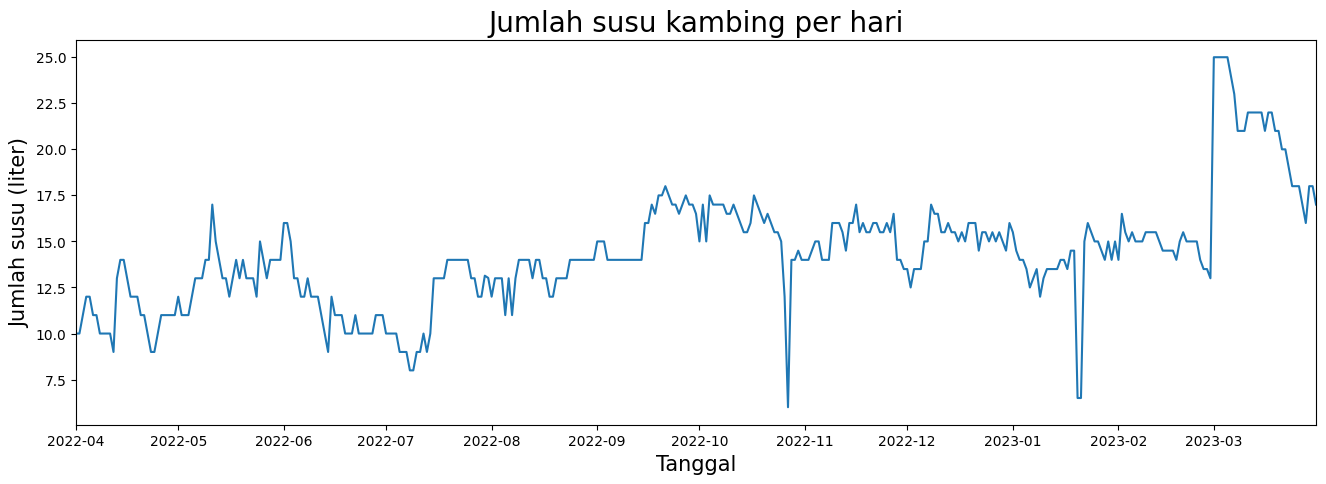

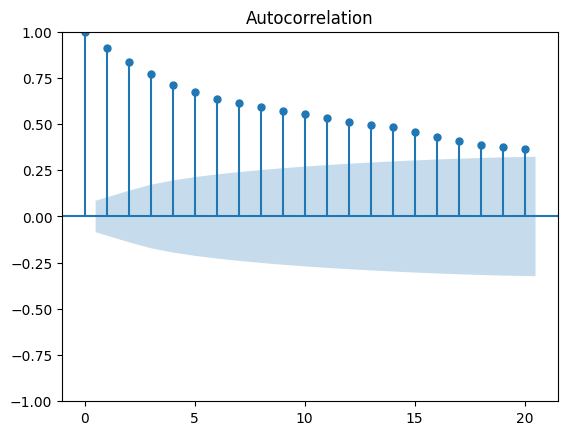

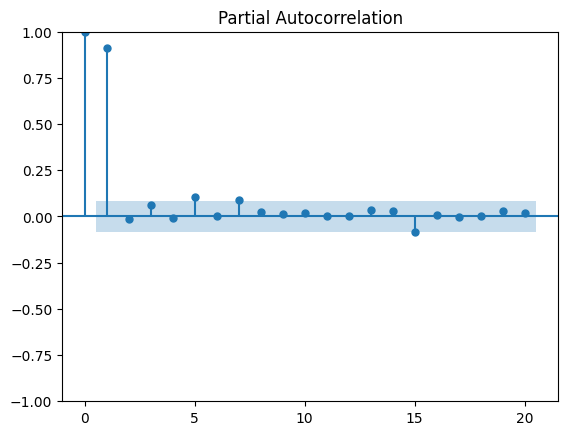

In [20]:
for filename in os.listdir(INPUT_PATH):
    
    if not filename.endswith(".csv"):
        continue
    
    print(filename)
    data_df = pd.read_csv(os.path.join(INPUT_PATH, filename))
    
    data_df['date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')
    
    date_range_series = pd.date_range(
        start=data_df['date'].min(),
        end=data_df['date'].max(),
        freq='D'
    )
    
    lost_date_list = date_range_series.difference(data_df['date']).tolist()
    
    # check if there is any lost date
    if len(lost_date_list) > 0:
        for date in lost_date_list:
            print(date)
            
            data_df.loc[len(data_df)] = {
                'date': date,
                'jumlah_produksi': 0
            }
            
            # should search id of date in next update
            
        data_df = data_df.sort_values(by='date').reset_index(drop=True)

    # check if there is any missing value
    data_df = data_df.fillna(0)
    if len(data_df[data_df['jumlah_produksi'] == 0]) > 0:
        
        for index, row in data_df.iterrows():
            
            if row['jumlah_produksi'] != 0:
                continue
            
            if index > (TOTAL_DAY_TO_FILL_MISSING_VALUES - 1):
                start_index = index - TOTAL_DAY_TO_FILL_MISSING_VALUES
                end_index = index - 1
                
                temp_df = data_df.loc[start_index:end_index, :]
            else:
                temp_df = data_df.loc[:index, :]
                
            avg = round(temp_df['jumlah_produksi'].mean(), 2)
            data_df.loc[index, 'jumlah_produksi'] = avg
    
    if data_df['id_unit_ternak'].unique().tolist()[0] == 0:
        data_df['id_unit_ternak'] = None
                
    data_df.to_csv(os.path.join(OUTPUT_PATH, filename), index=False)
            
    # plot the data
    if not os.path.exists(os.path.join(PLOT_PATH, filename.replace('.csv', ''))):
        os.makedirs(os.path.join(PLOT_PATH, filename.replace('.csv', '')))
    
    plot_df = data_df.copy()
    plot_df = plot_df.set_index('date')

    fig = plt.subplots(figsize=(16, 5))

    plt.plot(plot_df.index, plot_df['jumlah_produksi'])
    plt.title('Jumlah susu kambing per hari', fontsize=20)
    plt.xlabel('Tanggal', fontsize=15)
    plt.ylabel('Jumlah susu (liter)', fontsize=15)
    plt.xlim(plot_df.index.min(), plot_df.index.max())

    plt.xticks()
    plt.savefig(os.path.join(PLOT_PATH, filename.replace('.csv', ''), 'plot_data.png'))
    
    # plot ACF
    plot_acf(data_df['jumlah_produksi'], lags=20)
    plt.savefig(os.path.join(PLOT_PATH, filename.replace('.csv', ''), 'plot_ACF.png'))
    plt.show()

    # plot PACF
    plot_pacf(data_df['jumlah_produksi'], lags=20)
    plt.savefig(os.path.join(PLOT_PATH, filename.replace('.csv', ''), 'plot_PACF.png'))
    plt.show()